In [3]:
import pandas as pd
import numpy as np
from numpy import median
import statistics
import matplotlib.pyplot as plt

# 1. Quer se estudar o número de erros de impressão de um livro. Para isso escolheu-se uma amostra de 50 páginas, encontrando-se o número de erros por página da tabela abaixo.

In [4]:
erros = [0, 1, 2, 3, 4]
frequencia = [25, 20, 3, 1, 1]

Tabela1 = pd.DataFrame({"Erros": erros,
"Frequência": frequencia})

Tabela1

,Erros,Frequência
0,0,25
1,1,20
2,2,3
3,3,1
4,4,1


(a) Qual o número médio de erros por página?

In [5]:
mediaDeErros = (erros[0]*frequencia[0]+erros[1]*frequencia[1]+erros[2]*frequencia[2]+erros[3]*frequencia[3]+erros[4]*frequencia[4])/sum(frequencia)
mediaDeErros

0.66

(b) E o número mediano?

In [6]:
rol = []

for i in range(len(frequencia)):
    for j in range(frequencia[i]):
        rol.append(erros[i])
        
median(rol)

0.5

(c) Qual é o desvio padrão?

In [7]:
statistics.stdev(rol)

0.8478062928547309

(d) Faça uma representação gráfica para a distribuição.

# 2. As taxas de juros recebidas por 10 ações durante um certo período foram (medidas em porcentagem) 2,59; 2,64; 2,60; 2,62; 2,57; 2,55; 2,61; 2,50; 2,63; 2,64. Calcule a média, a mediana e o desvio padrão.

In [8]:
valores = [2.59, 2.64, 2.60, 2.62, 2.57, 2.55, 2.61, 2.50, 2.63, 2.64]

Média

In [9]:
valores

[2.59, 2.64, 2.6, 2.62, 2.57, 2.55, 2.61, 2.5, 2.63, 2.64]

In [10]:
media = sum(valores) / len(valores)
media

2.5949999999999998

Mediana

In [11]:
mediana = median(valores)
mediana

2.605

Desvio Padrão

In [12]:
desvioPadrao = statistics.stdev(valores)
desvioPadrao

0.04453463071962468

# 3. Para facilitar um projeto de ampliação da rede de esgoto de uma certa região de uma cidade, as autoridades tomaram uma amostra de tamanho 50 dos 270 quarteirões que compõem a região, e foram encontrados os seguintes números de casas por quarteirão:

In [13]:
casos = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44, 45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

In [14]:
df = pd.DataFrame({"Casos": casos})
df.head()

,Casos
0,2
1,2
2,3
3,10
4,13


In [15]:
def dist_frequencia_classes(x, nc='auto'):
    #função histogram do numpy para calcular as freq. absolutas e intervalos das classes
    fa,classes= np.histogram(x, bins=nc) 
    fa = fa.astype(int)#pra transformar em int 
    #freq. relativas = freq. absolutas/no. de dados do conjunto x 100 pra forma percentual
    fr = np.around(fa/fa.sum()*100,decimals=2) #duas casas decimais
    #freq. cumulativa usando a função cumsum do numpy
    #frnorm = np.around(fi/(fi.sum() * np.diff(classes)),decimals=2)
    fc = np.cumsum(fa).astype(int) #pra transformar em int 
    # o laço a seguir serve unicamente para escrever os intervalos das classes como strings
    # dentro do vetor 'classe_str'
    classe_str = []
    for i in range(len(classes)):
        if i<=len(classes)-2:
            classe_str.append('{:2.2f} |-- {:2.2f}' .format(classes[i],classes[i+1]))
        else:
            break        
    # a função retorna um dataframe, cujas linhas serão indexadas pelo vetor 'classe_str', e as 
    #colunas terão as frequências absoluta (inteira), relativa (float) e cumulativa (int) calculadas 
    return pd.DataFrame({'Classes':classe_str, 
                         'fi': fa,
                         'fr': fr,
                         #'frnorm':frnorm,
                         'Fc': fc
                        }).set_index('Classes') # transforma a coluna 'Classes' nos indices das linhas 


In [16]:
dist_frequencia_classes(casos, nc=5)

,fi,fr,Fc
Classes,,,
2.00 |-- 21.00,13,26.0,13
21.00 |-- 40.00,14,28.0,27
40.00 |-- 59.00,8,16.0,35
59.00 |-- 78.00,9,18.0,44
78.00 |-- 97.00,6,12.0,50


a) Use cinco intervalos e construa um histograma.

<AxesSubplot:>

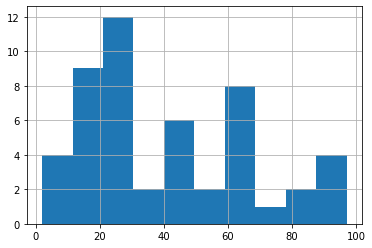

In [17]:
df['Casos'].hist()

(b) Determine uma medida de posição central e uma medida de dispersão

In [18]:
df.mean() #média como medida de posição central

Casos    40.42
dtype: float64

In [19]:
df['Casos'].std() #desvio padrão como medida de dispersão

26.07688005627567

# 4ª Questão

 (a) Dê uma situação prática onde você acha que a mediana é uma medida mais apropriada do que a média.

Quando uma variável possui valores distantes que fazem a média tender pra mais ou menos do que deveria.

(b) Esboce um histograma onde a média e a mediana coincidem. Existe alguma classe
de histogramas onde isso sempre acontece?

In [20]:
dados = [6,6,6,6,6,6]
newDF = df = pd.DataFrame({"Dados": dados})
newDF

,Dados
0,6
1,6
2,6
3,6
4,6
5,6


<AxesSubplot:>

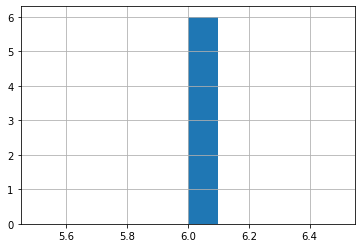

In [33]:
newDF['Dados'].hist()

In [21]:
newDF.mean()

Dados    6.0
dtype: float64

In [22]:
newDF.mean()

Dados    6.0
dtype: float64

In [23]:
#Mediana = Média
newDF.mean() == newDF.mean()

Dados    True
dtype: bool

# 5. Suponha que a variável de interesse tenha a distribuição como na figura abaixo.

Você acha que a média é uma boa medida de posição? E a mediana? Justifique.


Não, porque há muitos valores extremos, vários acima e outros muito abaixo. 

# 6. Numa pesquisa realizada com 100 famílias, levantaram-se as seguintes informações:

(a) Qual a mediana do número de filhos?

In [27]:
numeroDeFilhos = ["0", "1", "2", "3", "4", "5", ">=6"]
frequencia1 = [17, 20, 28, 19, 7, 4, 5]

tabela1 = pd.DataFrame({"Nº Filhos": numeroDeFilhos,
"Frequência de familias": frequencia1})

tabela1

,Nº Filhos,Frequência de familias
0,0,17
1,1,20
2,2,28
3,3,19
4,4,7
5,5,4
6,>=6,5


In [29]:
numeroDeFilhos = [0, 1, 2, 3, 4, 5, 6] #transformando em lista de inteiros e assumindo 6 como mais que 5
rol1 = []

for i in range(len(frequencia1)):
    for j in range(frequencia1[i]):
        rol1.append(numeroDeFilhos[i])



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6]


In [37]:
#Mediana
median(rol1) 

2.0

(b) E a moda?

In [39]:
# moda
statistics.mode(rol1)

2

(c) Que problemas você enfrentaria para calcular a média? Faça alguma suposição e
encontre-a.

O problema está em não saber qual valores são os maiores que 5. Eles podem ir de 6 a 30, por exemplo, e influenciar diretamente na média.